### Método de la Transformada Inversa

El método de la transformada inversa es una técnica utilizada para generar valores aleatorios que siguen una distribución de probabilidad específica, a partir de números aleatorios uniformes. Este método se basa en la relación entre la función de distribución y los números aleatorios uniformes.

1. **Considerar** $F$: Se parte de la función de probabilidad acumulada $F(x)$ de la distribución deseada.
2. **Generar números uniformes**: Se generan valores aleatorios  $u$  distribuidos uniformemente en el intervalo $[0, 1]$.
3. **Aplicar la inversa de la CDF**: Se calcula $x = F^{-1}(u)$, donde $F^{-1}$ es la función inversa de la CDF. Los valores $x$ obtenidos siguen la distribución deseada.

Este método es especialmente útil para distribuciones cuya CDF tiene una inversa analítica sencilla, como la distribución exponencial.

Bin width: 0.11963335092798433


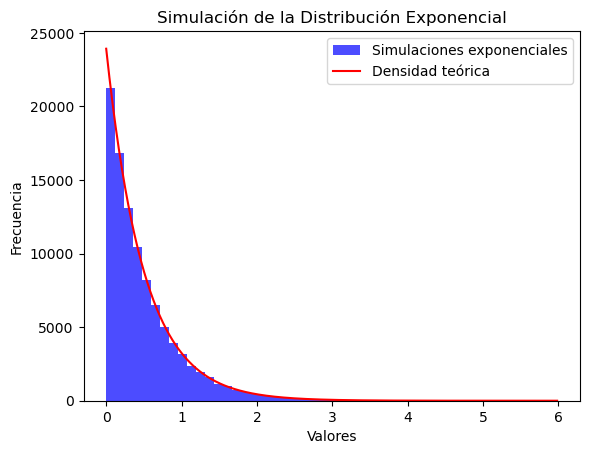

In [24]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Parámetro de la distribución exponencial (tasa lambda)
lambda_param = 2

# Número de muestras a generar
n_samples = 100000

# Generar números uniformes entre 0 y 1
uniform_random_numbers = np.random.uniform(0, 1, n_samples)

# Aplicar la transformada inversa para obtener muestras de la distribución exponencial
exponential_samples = -np.log(1 - uniform_random_numbers) / lambda_param

# Visualizar los resultados-----------------------------------------------------------
# Calcular el ancho de los bins (bin width)
bin_width = (np.max(exponential_samples) - np.min(exponential_samples)) / 50
print(f"Bin width: {bin_width}")

# Graficar el histograma
plt.hist(exponential_samples, bins=50, density = False, alpha=0.7, color='blue', label='Simulaciones exponenciales')

# Graficar la función de densidad teórica
# Crear la función de densidad teórica usando scipy.stats
# Escalar la función de densidad teórica para que corresponda al histograma de frecuencias absolutas
x = np.linspace(0, np.max(exponential_samples), 1000)
pdf = expon.pdf(x, scale=1/lambda_param) * len(exponential_samples) *  bin_width
plt.plot(x, pdf, 'r-', label='Densidad teórica')

plt.title('Simulación de la Distribución Exponencial')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

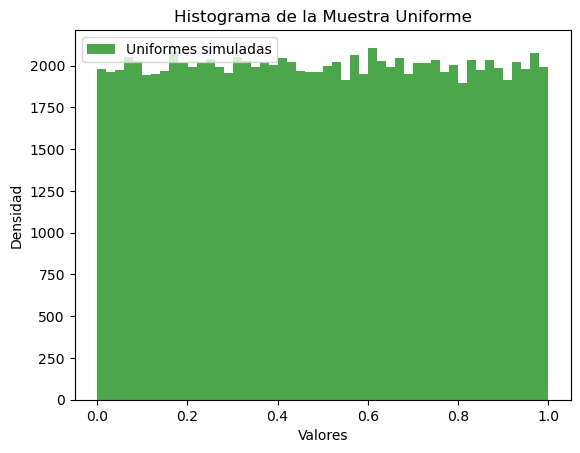

In [25]:
plt.hist(uniform_random_numbers, bins=50, density=False, alpha=0.7, color='green', label='Uniformes simuladas')
plt.title('Histograma de la Muestra Uniforme')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [26]:
# Definir el evento complejo: tiempo de vida entre 2 y 4 años
evento = (exponential_samples >= 2) & (exponential_samples <= 4)

# Calcular la probabilidad usando Montecarlo
probabilidad_evento = np.sum(evento) / len(exponential_samples)

print(f"La probabilidad de que el tiempo de vida del foco esté entre 2 y 4 años es aproximadamente {probabilidad_evento:.4f}")

La probabilidad de que el tiempo de vida del foco esté entre 2 y 4 años es aproximadamente 0.0179


In [23]:
np.exp(-4)-np.exp(-8)

0.017980176260831666

## $\pi$ es un número normal, o sea que sus dígitos aparecen un número uniforme de veces

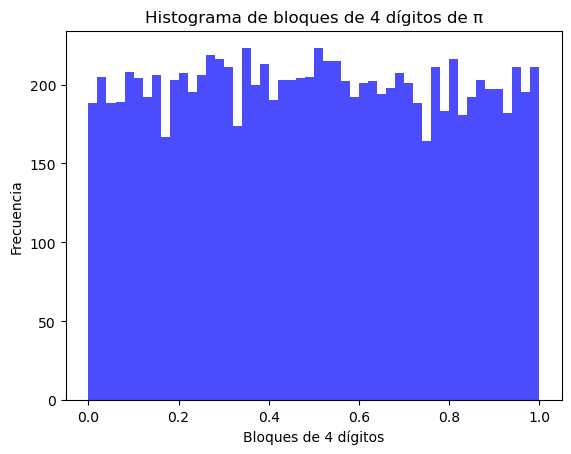

In [10]:
from mpmath import mp

import matplotlib.pyplot as plt

# Configurar mpmath para calcular 40,000 dígitos de π
mp.dps = 40000  # Establecer la precisión a 40,000 dígitos
pi_str = str(mp.pi)[2:]  # Obtener π como cadena sin "3."

# Agrupar los dígitos en bloques de 4
U = [int(pi_str[i:i+4])/10000 for i in range(0, len(pi_str), 4)]

# Crear el histograma
plt.hist(U, bins=50, color='blue', alpha=0.7)
plt.title('Histograma de bloques de 4 dígitos de π')
plt.xlabel('Bloques de 4 dígitos')
plt.ylabel('Frecuencia')
plt.show()

## Método de aceptación y rechazo


El método de aceptación y rechazo es una técnica de simulación utilizada para generar muestras aleatorias de una distribución objetivo compleja, especialmente cuando no es posible muestrear directamente de ella. Este método se basa en utilizar una distribución propuesta más sencilla, cuya densidad de probabilidad es fácil de muestrear y que **domina** a la densidad objetivo multiplicada por una constante de escalamiento. Los pasos principales incluyen generar muestras de la distribución propuesta, calcular una probabilidad de aceptación basada en la relación entre las densidades de la distribución objetivo y la propuesta, y aceptar o rechazar las muestras según un criterio aleatorio. Este enfoque es ampliamente utilizado en estadística y aprendizaje automático para simulaciones Monte Carlo y métodos bayesianos.

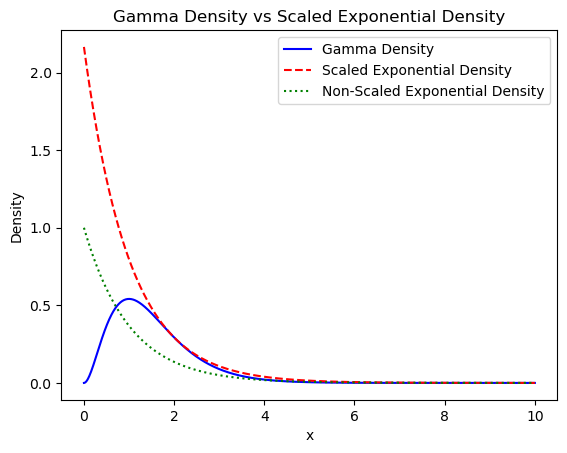

In [21]:
# Plot the Gamma density
x = np.linspace(0, 10, 1000)
gamma_pdf = (beta ** alpha) * (x ** (alpha - 1)) * np.exp(-beta * x) / np.math.gamma(alpha)
plt.plot(x, gamma_pdf, label='Gamma Density', color='blue')

# Plot the scaled exponential density
scaled_exponential_pdf = c * lambdaa * np.exp(-lambdaa * x)
plt.plot(x, scaled_exponential_pdf, label='Scaled Exponential Density', color='red', linestyle='--')


# Plot the non-scaled exponential density
non_scaled_exponential_pdf = lambdaa * np.exp(-lambdaa * x)
plt.plot(x, non_scaled_exponential_pdf, label='Non-Scaled Exponential Density', color='green', linestyle=':')



# Add labels and legend
plt.title('Gamma Density vs Scaled Exponential Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

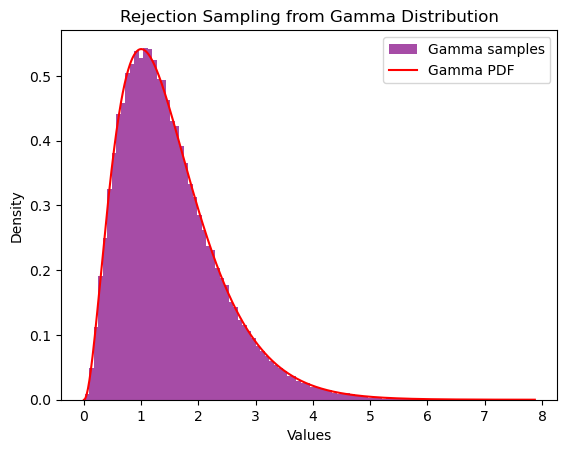

In [28]:
# Parameters of the Gamma distribution
alpha = 3  # Shape parameter
beta = 2   # Rate parameter (inverse scale)

# Parameter of the proposal exponential distribution
lambdaa = 1  # Must be less than beta

c = (beta ** alpha) / (np.math.gamma(alpha) * lambdaa) * \
    ((alpha - 1) / (beta - lambdaa)) ** (alpha - 1) * \
    np.exp(-(alpha - 1))

# Number of samples to generate
n_samples_gamma = 100000

# Rejection sampling
gamma_samples = []
while len(gamma_samples) < n_samples_gamma:
    # Sample from the proposal exponential distribution
    y = np.random.exponential(scale=1/lambdaa)
    
    # Compute the acceptance probability
    acceptance_prob = (beta ** alpha) * (y ** (alpha - 1)) * np.exp(-beta * y) / \
                      (np.math.gamma(alpha)* c * lambdaa * np.exp(-lambdaa * y))
    
    # Accept or reject the sample
    if np.random.uniform(0, 1) < acceptance_prob:
        gamma_samples.append(y)

# Convert the list to a numpy array
gamma_samples = np.array(gamma_samples)

# Plot the histogram of the samples
plt.hist(gamma_samples, bins=100, density=True, alpha=0.7, color='purple', label='Gamma samples')

# Plot the theoretical Gamma PDF
x = np.linspace(0, np.max(gamma_samples), 1000)
gamma_pdf = (beta ** alpha) * (x ** (alpha - 1)) * np.exp(-beta * x) / np.math.gamma(alpha)
plt.plot(x, gamma_pdf, 'r-', label='Gamma PDF')

plt.title('Rejection Sampling from Gamma Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

## Simulación Monte Carlo

In [45]:
import numpy as np

# Número de simulaciones
n = 1000000

# Paso 1: Muestras uniformes en [0,1]
X = np.random.uniform(0, 1, n)

# Paso 2: Evaluar la función del semicírculo
f_X = np.sqrt(1 - X**2)

# Paso 3: Calcular el promedio
area_aprox = np.mean(f_X)

print(f"Aproximación del área bajo el semicírculo: {area_aprox:.4f}")




Aproximación del área bajo el semicírculo: 0.7855


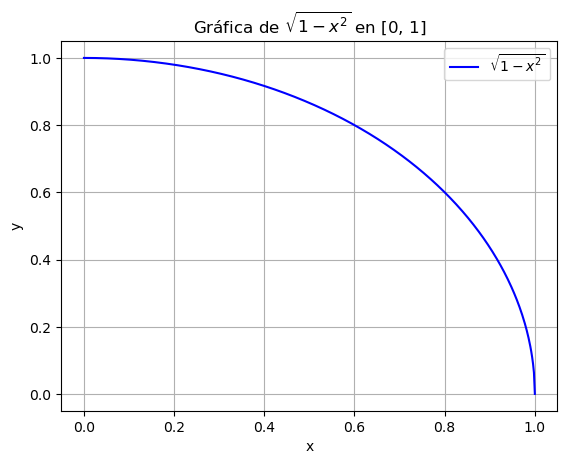

In [46]:
import numpy as np

import matplotlib.pyplot as plt

# Crear el rango de valores de x
x = np.linspace(0, 1, 500)

# Evaluar la función
y = np.sqrt(1 - x**2)

# Graficar la función
plt.plot(x, y, label=r'$\sqrt{1-x^2}$', color='blue')
plt.title('Gráfica de $\sqrt{1-x^2}$ en [0, 1]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
import numpy as np
import scipy.stats as stats

# Parámetros de las distribuciones Gamma
alpha_A, beta_A = 4, 25000  # Estados Unidos (Ana)
alpha_L, beta_L = 3, 6667   # México (Luis)

# Número de simulaciones
n = 10000000

# Paso 1: Generar muestras de ingresos para Ana y Luis
X_A = np.random.gamma(alpha_A, beta_A, n)
X_L = np.random.gamma(alpha_L, beta_L, n)

# Paso 2: Calcular los percentiles de ambas poblaciones
q_A_50 = np.percentile(X_A, 50)
q_L_90 = np.percentile(X_L, 90)

# Paso 3: Filtrar las muestras que están por encima del percentil 90
X_A_filtered = X_A[X_A > q_A_50]
X_L_filtered = X_L[X_L > q_L_90]

# Paso 4: Estimar la probabilidad de que Ana gane al menos el triple de lo que gana Luis
# Necesitamos que las dos muestras sean del mismo tamaño para compararlas
min_size = min(len(X_A_filtered), len(X_L_filtered))
X_A_filtered = X_A_filtered[:min_size]
X_L_filtered = X_L_filtered[:min_size]

# Estimar la probabilidad
probabilidad = np.mean(X_A_filtered >= 3 * X_L_filtered)

# Mostrar el resultado
print(f"Probabilidad de que Ana gane al menos el triple que Luis: {probabilidad:.4f}")


Probabilidad de que Ana gane al menos el triple que Luis: 0.4892


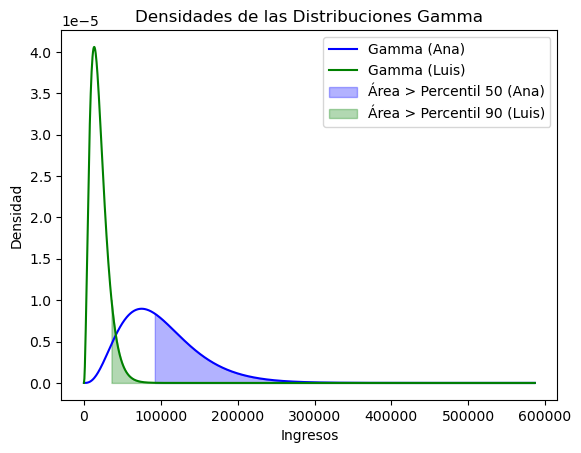

In [41]:
# Crear el rango de valores para graficar las densidades
x_values = np.linspace(0, max(np.max(X_A), np.max(X_L)), 1000)

# Calcular las densidades teóricas de las distribuciones Gamma
gamma_pdf_A = stats.gamma.pdf(x_values, a=alpha_A, scale=beta_A)
gamma_pdf_L = stats.gamma.pdf(x_values, a=alpha_L, scale=beta_L)

# Graficar las densidades
plt.plot(x_values, gamma_pdf_A, label='Gamma (Ana)', color='blue')
plt.plot(x_values, gamma_pdf_L, label='Gamma (Luis)', color='green')

# Sombrear el área por encima del percentil 90 para Ana
x_shade_A = x_values[x_values > q_A_50]
y_shade_A = stats.gamma.pdf(x_shade_A, a=alpha_A, scale=beta_A)
plt.fill_between(x_shade_A, y_shade_A, color='blue', alpha=0.3, label='Área > Percentil 50 (Ana)')

# Sombrear el área por encima del percentil 90 para Luis
x_shade_L = x_values[x_values > q_L_90]
y_shade_L = stats.gamma.pdf(x_shade_L, a=alpha_L, scale=beta_L)
plt.fill_between(x_shade_L, y_shade_L, color='green', alpha=0.3, label='Área > Percentil 90 (Luis)')

# Configurar la gráfica
plt.title('Densidades de las Distribuciones Gamma')
plt.xlabel('Ingresos')
plt.ylabel('Densidad')
plt.legend()
plt.show()